In [1]:
import pink
import tools
import numpy as np

myiter = iter(tools.DataIterator("data/efigi.bin"))

version: 2
file_type: 0
data_type: 0
number_of_images: 4458
layout: 0
dimensionality: 2
dimensions: [255 255]
size: 65025


In [2]:
# %matplotlib inline
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10,10))
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(images[i])
#     plt.xlabel(i)

In [3]:
import math

som_dim = 8
neuron_dim = int(myiter.dimensions[0] / math.sqrt(2.0) * 2.0)
euclid_dim = int(myiter.dimensions[0] * math.sqrt(2.0) / 2.0)
print("neuron_dim = ", neuron_dim)
print("euclid_dim = ", euclid_dim)

np_som = np.random.rand(som_dim, som_dim, neuron_dim, neuron_dim).astype(np.float32)
som = pink.SOM(np_som, neuron_layout="cartesian-2d")

trainer = pink.Trainer(som, number_of_rotations=180, euclidean_distance_dim=euclid_dim)

neuron_dim =  360
euclid_dim =  180


In [4]:
from tqdm import tqdm_notebook

for image in tqdm_notebook(myiter, total=myiter.number_of_images):
    trainer(pink.Data(image))

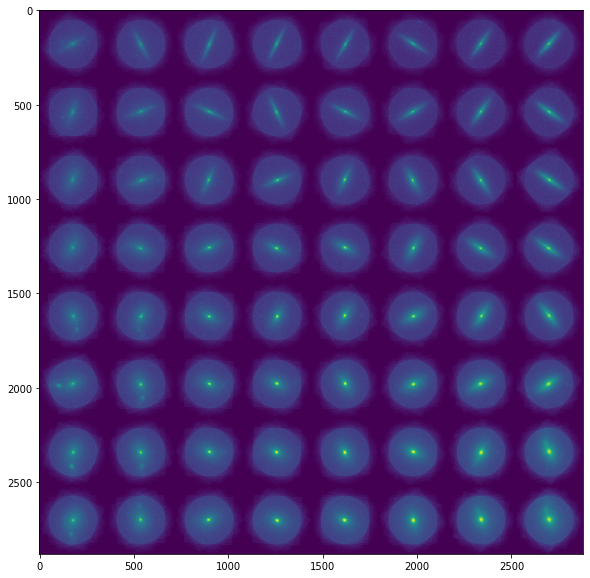

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

trainer.update_som()
np_som = np.array(som, copy=True)

plt.figure(figsize=(10,10))
plt.imshow(np_som.swapaxes(1, 2).reshape((som_dim * neuron_dim, som_dim * neuron_dim)))
plt.grid(False)